# Исследование тарифных планов оператора "Мегалайн"

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Описание данных:<br>

Таблица users (информация о пользователях):<br>
* user_id — уникальный идентификатор пользователя <br>
* first_name — имя пользователя <br>
* last_name — фамилия пользователя<br>
* age — возраст пользователя (годы)<br>
* reg_date — дата подключения тарифа (день, месяц, год)<br>
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)<br>
* city — город проживания пользователя<br>
* tarif — название тарифного плана<br>

Таблица calls (информация о звонках):<br>
* id — уникальный номер звонка<br>
* call_date — дата звонка<br>
* duration — длительность звонка в минутах<br>
* user_id — идентификатор пользователя, сделавшего звонок<br>

Таблица messages (информация о сообщениях):<br>
* id — уникальный номер сообщения<br>
message_date — дата сообщения<br>
* user_id — идентификатор пользователя, отправившего сообщение<br>

Таблица internet (информация об интернет-сессиях):<br>
* id — уникальный номер сессии<br>
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)<br>
* session_date — дата интернет-сессии<br>
* user_id — идентификатор пользователя<br>

Таблица tariffs (информация о тарифах):<br>
* tariff_name — название тарифа<br>
* rub_monthly_fee — ежемесячная абонентская плата в рублях<br>
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату<br>
* messages_included — количество сообщений в месяц, включённых в абонентскую плату<br>
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)<br>
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)<br>
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета<br>
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)<br>

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

Изучим первую таблицу - информацию о пользователях

In [2]:
users = pd.read_csv('/datasets/users.csv')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [3]:
users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [4]:
users = users.drop_duplicates().reset_index(drop = True) #на всякий случай проверяем дубликаты

Изучим вторую таблицу - информацию о звонках.

In [5]:
calls = pd.read_csv('/datasets/calls.csv')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [6]:
calls.head(20)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [7]:
calls = calls.drop_duplicates().reset_index(drop = True)

Изучим третью таблицу - информацию о сообщениях.

In [8]:
messages = pd.read_csv('/datasets/messages.csv')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [9]:
messages.head(20)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [10]:
messages = messages.drop_duplicates().reset_index(drop = True)

Изучим четвертую таблицу - информацию об интернет-сессиях.

In [11]:
internet = pd.read_csv('/datasets/internet.csv')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [12]:
internet.head(20)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [13]:
internet = internet.drop_duplicates().reset_index(drop = True)

Изучим последнюю таблицу - информацию о тарифах.

In [14]:
tariffs = pd.read_csv('/datasets/tariffs.csv')
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [15]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


### Вывод

Исходные данные выглядят довольно чисто.<br>
Есть простор для оптимизации типов данных. Также не вижу смысла держать личную информацию о пользователях, в рамках решения задачи она нам не пригодится. Из странностей - в таблицу с сессиями попал некий столбец "Unnamed: 0", не несущий в себе смысловой назгрузки.

## Предобработка данных

Первым делом отсечем лишние столбцы в таблицах.

In [16]:
users = users.drop(['age', "first_name", "last_name"], axis = 1)
internet = internet.drop(["Unnamed: 0"], axis = 1)

Оптимизируем типы данных.

In [17]:
users = users.astype({"user_id": "uint16"})
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls['duration'] = calls['duration'].apply(np.ceil) #округлим длительность звонка в большую сторону в соответствии с условием задачи
calls = calls.astype({"user_id": "uint16", "duration": "uint8"})

messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages = messages.astype({"user_id": "uint16"})

internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet = internet.astype({"user_id": "uint16"})

tariffs = tariffs.astype({'messages_included': 'uint8', 'mb_per_month_included': "uint16", 'minutes_included': 'uint16', 
                          'rub_monthly_fee': 'uint16', 'rub_per_gb': 'uint8', 'rub_per_message': 'uint8', 'rub_per_minute':'uint8'})

Цитирую условие задачи:
"В данных вы найдёте звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять."<br>
Исходя из этого оперировал, что пропуск звонка - это пропущенные звонки.

Пропуск в трафике это подозрительно, согласен. Однако при расчёте выручки эти нули не испортят нам картину никак. Плюс ноль есть плюс ноль. Поэтому я не стал их трогать.


Посчитаем для каждого пользователя
количество сделанных звонков и израсходованных минут разговора по месяцам:

In [18]:
calls['call_date'] = calls['call_date'].dt.month #оставляем только месяц

In [19]:
grouped_calls = calls.groupby(['user_id', 'call_date']).agg({'duration': ['sum','count']}) # группируем данные по пользователю и месяцу
grouped_calls = grouped_calls.droplevel(level = 0, axis = 1)
grouped_calls = grouped_calls.reset_index()
grouped_calls.rename(columns={'call_date': 'month', 'sum': 'total_duration', 'count': 'number_of_calls'}, inplace=True)

In [20]:
grouped_calls.head(10)

,user_id,month,total_duration,number_of_calls
0,1000,5,159.0,22
1,1000,6,172.0,43
2,1000,7,340.0,47
3,1000,8,408.0,52
4,1000,9,466.0,58
5,1000,10,350.0,57
6,1000,11,338.0,43
7,1000,12,333.0,46
8,1001,11,430.0,59
9,1001,12,414.0,63


Количество отправленных сообщений по месяцам:

In [21]:
messages['message_date'] = messages['message_date'].dt.month #оставляем только месяц

In [22]:
grouped_messages = messages.groupby(['user_id', 'message_date']).agg('count') # группируем данные по пользователю и месяцу
grouped_messages = grouped_messages.reset_index()
grouped_messages.rename(columns={'message_date': 'month', 'id': 'number_of_messages'}, inplace=True)

In [23]:
grouped_messages.head(10)

,user_id,month,number_of_messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
5,1000,10,73
6,1000,11,58
7,1000,12,70
8,1002,6,4
9,1002,7,11


Объем израсходованного интернет-трафика по месяцам:

In [24]:
internet['session_date'] = internet['session_date'].dt.month #оставляем только месяц

In [25]:
grouped_internet = internet.groupby(['user_id', 'session_date']).agg('sum') # группируем данные по пользователю и месяцу
grouped_internet = grouped_internet.reset_index()
grouped_internet.rename(columns={'session_date': 'month', 'mb_used': "gb_used"}, inplace=True)
grouped_internet['gb_used'] = grouped_internet['gb_used'] / 1024
grouped_internet['gb_used'] = grouped_internet['gb_used'].apply(np.ceil)

In [26]:
grouped_internet.head(10)

,user_id,month,gb_used
0,1000,5,3.0
1,1000,6,23.0
2,1000,7,14.0
3,1000,8,14.0
4,1000,9,15.0
5,1000,10,15.0
6,1000,11,15.0
7,1000,12,10.0
8,1001,11,18.0
9,1001,12,14.0


Объединим полученные таблицы.

In [27]:
data = grouped_calls.merge(grouped_messages, how='outer', on=['user_id', 'month'])
data = data.merge(grouped_internet, how='outer', on=['user_id', 'month'])

Здесь я понимаю, что в таблицу нужно добавить city и tariff из таблицы users, соответственно остальные данные из неё нам больше не нужны.

In [28]:
users = users.drop(['reg_date', "churn_date"], axis = 1)
data = data.merge(users, how='outer', on=['user_id'])

In [29]:
data = data.astype({'month': 'Int8', 'total_duration': "Int16", 'number_of_calls': 'Int16', 
                    'number_of_messages': 'Int16', 'gb_used': 'Int16'})

In [30]:
data.head()

,user_id,month,total_duration,number_of_calls,number_of_messages,gb_used,city,tariff
0,1000,5,159,22,22,3,Краснодар,ultra
1,1000,6,172,43,60,23,Краснодар,ultra
2,1000,7,340,47,75,14,Краснодар,ultra
3,1000,8,408,52,81,14,Краснодар,ultra
4,1000,9,466,58,57,15,Краснодар,ultra


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             3216 non-null   uint64
 1   month               3214 non-null   Int8  
 2   total_duration      3174 non-null   Int16 
 3   number_of_calls     3174 non-null   Int16 
 4   number_of_messages  2717 non-null   Int16 
 5   gb_used             3203 non-null   Int16 
 6   city                3216 non-null   object
 7   tariff              3216 non-null   object
dtypes: Int16(4), Int8(1), object(2), uint64(1)
memory usage: 144.5+ KB


In [32]:
data['month'][3214] = 12 
data['month'][3215] = 12
data = data.fillna(0)

Для начала посмотрел пропуски с месяцем. Оказалось, у этих клиентов пропуски и в total_duration, number_of_calls, number_of_messages, gb_used.<br>
Данные клиенты купили тариф, но не пользовались им и через несколько дней отказались от симки. Тем не менее деньги заплачены.<br>
Так как month у них был заполнен только в одной из объединяемых таблиц, то в результирующей оказался NaN.
Заполнил эти два пробела вручную. А можно было сделать так, чтоб он эти месяцы подцепил при объединении?

Остальные значение это действительно неиспользуемые услуги, т.е. нули, тут кроме fillna(0) не вижу другого решения.

Посчитаем выручку с каждого клиента по месяцам. Напишем функцию и применим к таблице.

In [33]:
def revenue_check(row):
    revenue = 0
    
    revenue_ultra = 1950
    duration_ultra = 3000
    duration_ultra_price = 1
    gb_ultra = 30
    gb_ultra_price = 150
    messages_ultra = 1000
    messages_ultra_price = 1
    
    
    revenue_smart = 550
    duration_smart = 500
    duration_smart_price = 3
    gb_smart = 15
    gb_smart_price = 200
    messages_smart = 50
    messages_smart_price = 3
    
    
    
    tariff = row['tariff']
    gb = row['gb_used']
    duration = row['total_duration']
    messages = row['number_of_messages']
    if tariff == 'ultra':
        revenue += revenue_ultra #включаем ежемесячную плату
        if duration > duration_ultra:
            revenue += (duration - duration_ultra) * duration_ultra_price
        if gb > gb_ultra:
            revenue += (gb - gb_ultra) * gb_ultra_price
        if messages > messages_ultra:
            revenue += (messages - messages_ultra) * messages_ultra_price
        return revenue
    else:
        revenue += revenue_smart #включаем ежемесячную плату
        if duration > duration_smart:
            revenue += (duration - duration_smart) * duration_smart_price
        if gb > gb_smart:
            revenue += (gb - gb_smart) * gb_smart_price
        if messages > messages_smart:
            revenue += (messages - messages_smart) * messages_smart_price
    return revenue
data['revenue'] = data.apply(revenue_check, axis = 1)

In [34]:
data

,user_id,month,total_duration,number_of_calls,number_of_messages,gb_used,city,tariff,revenue
0,1000,5,159,22,22,3,Краснодар,ultra,1950
1,1000,6,172,43,60,23,Краснодар,ultra,1950
2,1000,7,340,47,75,14,Краснодар,ultra,1950
3,1000,8,408,52,81,14,Краснодар,ultra,1950
4,1000,9,466,58,57,15,Краснодар,ultra,1950
...,...,...,...,...,...,...,...,...,...
3211,1489,10,0,0,21,20,Санкт-Петербург,smart,1550
3212,1489,11,0,0,20,18,Санкт-Петербург,smart,1150
3213,1489,12,0,0,35,17,Санкт-Петербург,smart,950
3214,1128,12,0,0,0,0,Волжский,ultra,1950


## Анализ данных

### Тариф "Ультра"

Посчитаем среднее количество минут, сообщений и гигабайт трафика пользователей тарифа.

Найдём дисперсию и среднее отклонение этих величин.

In [35]:
data.groupby('tariff')[['total_duration', 'number_of_calls', 'number_of_messages', 'gb_used']].\
        agg(['mean', 'var', 'std'])

total_duration                            number_of_calls               \
                 mean            var         std            mean          var   
tariff                                                                          
smart      417.747534   36281.393836  190.476754        58.43722   674.107093   
ultra      526.089249  101052.493549  317.887549       73.318458  1932.194928   

                  number_of_messages                            gb_used  \
              std               mean          var        std       mean   
tariff                                                                    
smart   25.963572          33.369058   796.955256  28.230396  16.321525   
ultra   43.956739          49.313387  2285.417425  47.806040  19.474645   

                             
              var       std  
tariff                       
smart   33.133453  5.756167  
ultra   97.378544  9.868057

Построим гистограммы плотностей

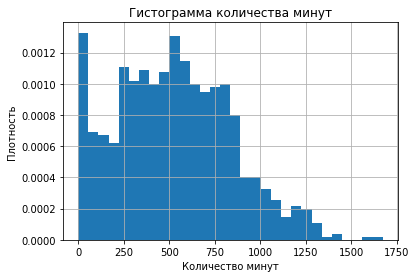

In [36]:
data[data['tariff'] == 'ultra']['total_duration'].hist(bins = 30, density = 'True')
plt.xlabel('Количество минут')
plt.ylabel('Плотность')
plt.title('Гистограмма количества минут')
plt.show()

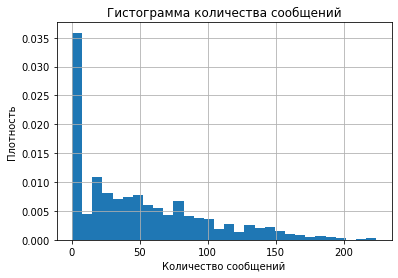

In [37]:
data[data['tariff'] == 'ultra']['number_of_messages'].hist(bins = 30, density = 'True')
plt.xlabel('Количество сообщений')
plt.ylabel('Плотность')
plt.title('Гистограмма количества сообщений')
plt.show()

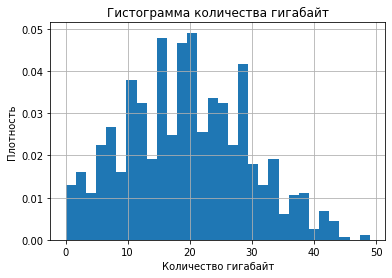

In [38]:
data[data['tariff'] == 'ultra']['gb_used'].hist(bins = 30, density = 'True')
plt.xlabel('Количество гигабайт')
plt.ylabel('Плотность')
plt.title('Гистограмма количества гигабайт')
plt.show()

Гистограмма количества минут и гигабайт имеют чёткие признаки нормального распределения (в случае с минутами - скошенная вправо). Гистограмма количества сообщений больше похоже на экспоненциальное распределение.

### Тариф "Смарт"

Посчитаем среднее количество минут, сообщений и гигабайт трафика пользователей тарифа.

In [39]:
data.groupby('tariff')[['total_duration', 'number_of_calls', 'number_of_messages', 'gb_used']].\
        agg(['mean', 'var', 'std'])

total_duration                            number_of_calls               \
                 mean            var         std            mean          var   
tariff                                                                          
smart      417.747534   36281.393836  190.476754        58.43722   674.107093   
ultra      526.089249  101052.493549  317.887549       73.318458  1932.194928   

                  number_of_messages                            gb_used  \
              std               mean          var        std       mean   
tariff                                                                    
smart   25.963572          33.369058   796.955256  28.230396  16.321525   
ultra   43.956739          49.313387  2285.417425  47.806040  19.474645   

                             
              var       std  
tariff                       
smart   33.133453  5.756167  
ultra   97.378544  9.868057

Построим гистограммы плотностей

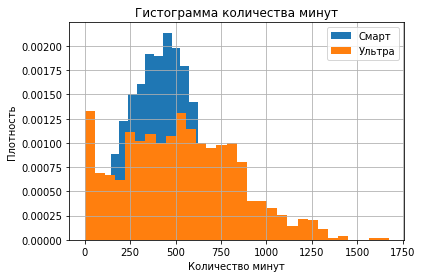

In [40]:
data[data['tariff'] != 'ultra']['total_duration'].hist(bins = 30, density = 'True', label = 'Смарт')
data[data['tariff'] == 'ultra']['total_duration'].hist(bins = 30, density = 'True', label = 'Ультра')
plt.xlabel('Количество минут')
plt.ylabel('Плотность')
plt.title('Гистограмма количества минут')
plt.legend()
plt.show()

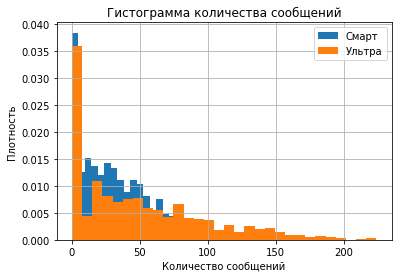

In [41]:
data[data['tariff'] != 'ultra']['number_of_messages'].hist(bins = 30, density = 'True', label = 'Смарт')
data[data['tariff'] == 'ultra']['number_of_messages'].hist(bins = 30, density = 'True', label = 'Ультра')
plt.xlabel('Количество сообщений')
plt.ylabel('Плотность')
plt.title('Гистограмма количества сообщений')
plt.legend()
plt.show()

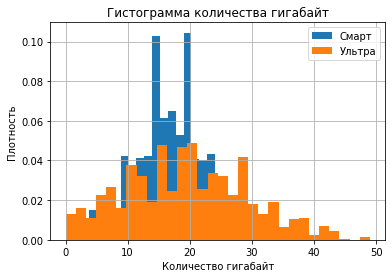

In [42]:
data[data['tariff'] != 'ultra']['gb_used'].hist(bins = 30, density = 'True', label = 'Смарт')
data[data['tariff'] == 'ultra']['gb_used'].hist(bins = 30, density = 'True', label = "Ультра")
plt.xlabel('Количество гигабайт')
plt.ylabel('Плотность')
plt.title('Гистограмма количества гигабайт')
plt.legend()
plt.show()

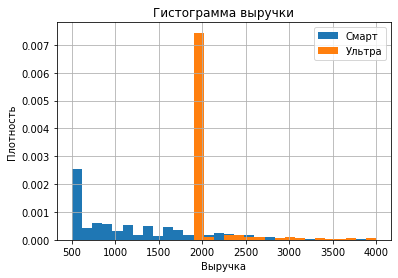

In [43]:
data[data['tariff'] != 'ultra']['revenue'].hist(bins = 30, density = 'True', label = 'Смарт', range = (500, 4000))
data[data['tariff'] == 'ultra']['revenue'].hist(bins = 30, density = 'True', label = "Ультра", range = (500, 4000))
plt.xlabel('Выручка')
plt.ylabel('Плотность')
plt.title('Гистограмма выручки')
plt.legend()
plt.show()

В случае с тарифом "Смарт" получены схожие выводы о распределениях, только график количества минут практически не скошен вправо.

## Проверка гипотез

Проверим две гипотезы согласно задаче. <br>
Начнём со средней выручки пользователей тарифов «Ультра» и «Смарт».<br>
За нулевую гипотезу примем следующее утверждение: выручка пользователей тарифов равна.<br>
За альтернативную - выручка пользователей тарифа «Ультра» выше.

Обозначим выборки, определимся с альфа и проверим гипотезу методом ttest_ind:

In [44]:
sample_ultra = data[data['tariff'] == 'ultra']
sample_smart = data[data['tariff'] == 'smart']

In [45]:
alpha = 0.05 # примем стандартный уровень критической значимости
results = st.ttest_ind(
    sample_ultra['revenue'], 
    sample_smart['revenue']) # найдем p-значение
results.pvalue

8.081909555489933e-161

In [46]:
if (results.pvalue < alpha) and (sample_ultra['revenue'].mean() > sample_smart['revenue'].mean()):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Отвергаем нулевую гипотезу


Аналогично проверим вторую гипотезу о средней выручке с жителей Москвы и других городов.
За нулевую гипотезу принимаем следующее утверждение: выручка пользователей Москвы отличается от выручки пользователей других регионов.
За альтернативную - выручка равны.

In [47]:
sample_moscow = data[data['city'] == 'Москва']
sample_regions = data[data['city'] != 'Москва']

In [48]:
alpha = 0.05 # примем стандартный уровень критической значимости
results2 = st.ttest_ind(
    sample_moscow['revenue'], 
    sample_regions['revenue']) # найдем p-значение
results2.pvalue

0.5400751614511182

In [49]:
if (results2.pvalue > alpha):
    print("Принимаем нулевую гипотезу")
else:
    print("Отвергаем нулевую гипотезу") 

Принимаем нулевую гипотезу


## Выводы

В результате выполнения проекта произведена предобработка данных: оптимизированы типы, удаленные неиспользуемые столбцы, проверено наличие дубликатов.

Создана результирующая таблица для каждого пользователя с разбивкой по месяцам, где подсчитано количество сделанных звонков, израсходованных минут, отправленных сообщений, объём трафика, выручка.

Произведён анализ поведения пользователей разных тарифных планов: <br>
Смарт: в среднем используется 423 минут, 34 сообщения и 7 гигибайт.<br>
Ультра: в среднем используется 528 минут, 51 сообщение и 19 гигабайт.

Посчитаны дисперсии данных величин и стандартные отклонения, построены гистограммы.

In [50]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,232,30720,3000,1950,150,1,1,ultra


Проверены гипотезы о средней выручке пользователей тарифов «Ультра» и «Смарт», а также о средней выручке пользователей из Москвы и регионов. Принятые нулевые гипотезы о равенстве соответствующих средних значений отвергнуты в результате применения метода scipy.stats.ttest_ind. <br>
Резюмируя выше сказанное, тариф "Ультра" в большинстве случаев приносит больше денег, чем тариф "Смарт".